# Introduction

## Objective

The objective of this project is to predict whether or not a patient has heart disease indicated as an integer value from 0 to 1 for the absense and presence of heart disease respectively. The dataset was sourced from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Heart+Disease <cite data-cite="heartDisease_uci"></cite>.

This project is presented in two phases, with the `Python` programming language used for both phases. Phase One is covered in this report and deals with data handling, preprocessing and cleaning, and data exploration. Beyond this, Phase Two will cover model building and analysis, critiques of each approach, and a summary of the entire project. This report is split up into four sections. Section 1, the Introduction, which presents the both the data to be used and the objective function of the project, Section 2, Data Preprocessing, which handles and cleans the data prior to any analysis, Section 3, Data Exploration, which explores the relationships between the variables in the dataset, and Section 4, a brief summary of the report.

## Data Set

The UCI Machine Learning Repository for heart disease contains data from four sources around the world: Budapest, Cleveland, Switzerland, and Long Beach, and each of these datasets includes both processed and unprocessed data. Processed versions of the data for each of the four locations are used in this project and variable names and information about the attributes of the data is listed on the main URL. Finally, the data set contains 917 instances with 14 descriptive features which are described below. 


### Descriptive Features

The data set contains the following list of variables.

* **`age`**: continuous.
* **`sex`**: (1 = male, 0 = female).
* **`cp`**: chest pain type. (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
* **`trestbps`**: resting blood pressure. (Continuous).
* **`chol`**: cholesterol. (Continuous).
* **`fbs`**: fasting blood sugar > 120 mg/dl. (1 = true, 0= false). 
* **`restecg`**: resting electrocardiographic results. (0 = normal, 1 = having SS-T wave abnormality, 2 = showing probable or definite left ventriular hypertrophy by Estes' criteria).
* **`thalach`**: maximum heart rate achieved. (Continuous). 
* **`exang`**: exercise enduced angina. (1 = yes, 0 = no).
* **`oldpeak`**: ST depression induced by exercise relative to rest. (Continuous).
* **`slope`**: the slope of the peak exercise ST segment. (1 = upsloping, 2 = flat, 3 = downsloping).
* **`ca`**: number of major vessels (0-3) coloured flouroscopy. 
* **`thal`**: thalassemia. (3 = normal, 6 = fixed defect, 7 = reversible defect).
* **`num`**: target value. (0 = absence, 1,2,3,4 = presence). 


### Target Feature

The target value `num` simply aims to distinguish between the absense of heart disease (target value of 0), from presence (values 1, 2, 3, 4) and is therefore given as:

$$\text{heart disease} = \begin{cases} \text{absent} & \text{if num} = 0 \\ \text{present} & \text{if num}\in \{1, 2, 3, 4\} \end{cases}$$

Since the target feature has two possible outcomes, it is a dichotomous variable and considering the differences in the type or severity of heart disease present is irrelevant (since the differences in the numbers 1, 2, 3, or 4 in the target feature is not defined), it is the presence or absense of heart disease that is important, therefore, the values of 1 through to 4 can be all modified to be 1 for simplicity. From this, the target feature becomes:

$$\text{num} = \begin{cases} 0 & \text{if heart disease is absent} \\ 1 & \text{heart disease is present} \end{cases}$$

# Data Preprocesssing

## Data Input

The data is imported from the UCI Machine Learning Repository through the `url` array variable in the code below and concatenated to create a whole data frame that is used in the report. Simultaneously, the variable names are defined through the `colNames` definition.

In [60]:
colNames = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
                  'exang','oldpeak','slope','ca','thal','num']
 
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/"\
               "heart-disease/processed.cleveland.data",
       "https://archive.ics.uci.edu/ml/machine-learning-databases/"\
               "heart-disease/processed.hungarian.data",
       "https://archive.ics.uci.edu/ml/machine-learning-databases/"\
               "heart-disease/processed.switzerland.data",
       "https://archive.ics.uci.edu/ml/machine-learning-databases/"\
               "heart-disease/processed.va.data"
      )    
import pandas as pd
clevelandData = pd.read_csv(url[0], header=None, names=colNames)
hungarianData = pd.read_csv(url[1], names=colNames, skiprows = 1)
switzerlandData = pd.read_csv(url[2], names=colNames, skiprows = 1)
vaData = pd.read_csv(url[3], names=colNames, skiprows = 1)

heartData = pd.concat([clevelandData, hungarianData, switzerlandData, vaData])

## Cleaning and Data Transformation

Initially, we check to see the range of unique values that are present amongst all the columns of the data set with the intention of handling erroneous values such as `?` or `NaN` values.

In [61]:
for col in colNames:
    print('Unique values for ' + col)
    print(heartData[col].unique())
    print('')

Unique values for age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76. 30. 31. 32. 33. 36. 72. 73. 75.]

Unique values for sex
[1. 0.]

Unique values for cp
[1. 4. 3. 2.]

Unique values for trestbps
[145.0 160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0
 105.0 124.0 125.0 142.0 128.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '120' '140' '170' '100' '105' '110' '125' '130' '150' '98'
 '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108' '124'
 '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95' '165'
 '80' '185' '126' '152' '116' '0' '144' '154' '104' '134' '178' '146'
 '158' '102' '96' '172' '156' '114' '127']

Unique values for chol
[233.0 286.0 229.0 250.0 204.0 236.0 268.

Every column excluding `num`, `age`, `sex`, and `cp` contains `?` values. In order to determine whether or not to impute these values or to remove them entirely, the frequency of their instances are determined. Furthermore, there seems to be formatting issues with some of the inputs that will be addressed further on, such as the presence or absence of quotations around numbers and decimal points in certain observations in a column variable, however these issues may be the cause of incorrectly coded data types of these variables.

Firstly, we can define an arbitrary missing value threshold for column removal at 60%, meaning that if the number of missing values of a column exceeds 60%, it is removed from the data set entirely, otherwise, the individual rows are removed.

In [53]:
columns = ['fbs', 'restecg', 'exang', 'chol', 'trestbps',
           'thalach', 'oldpeak', 'slope', 'ca', 'thal']
for col in columns:
    print(heartData[col].loc[heartData[col] == "?"].value_counts())
    print('')

Series([], Name: fbs, dtype: int64)

Series([], Name: restecg, dtype: int64)

Series([], Name: exang, dtype: int64)

Series([], Name: chol, dtype: int64)

Series([], Name: trestbps, dtype: int64)

Series([], Name: thalach, dtype: int64)

Series([], Name: oldpeak, dtype: int64)

Series([], Name: slope, dtype: int64)



KeyError: 'ca'

We can see only two instances `?` amongst the `restecg` column and can remove them comfortably without much information loss. The same can be done for every other variable other than `ca` since the total number of `?` occurances do not reach the 60% threshold. The `ca` variable contains 608 `?` instances out of 917 which equates to approximately 66%, so rather than remove each row which will result in a large amount of information loss, we remove the column entirely from the data set.

In [50]:
columns = ['fbs', 'restecg', 'exang', 'chol', 'trestbps', 
           'thalach', 'oldpeak', 'slope', 'thal']
for col in columns:
    heartData = heartData[heartData[col] != '?']

heartData = heartData.drop('ca', 1)

We check to confirm that the data types of the column variables in the data set match that of the description outlined in the documentation in the respository.

In [54]:
print("Data Types are: ")
print(heartData.dtypes)

Data Types are: 
age         float64
sex          object
cp           object
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
thal         object
num           int64
dtype: object


The only correctly coded variable is the target `num` column. The `object` variables that are continuous are to be redefined as a `float64` while the remaining variables are to be coded as `int64`.

In [6]:
heartData['age'] = heartData['age'].astype('int')
heartData['sex'] = heartData['sex'].astype('int')
heartData['cp'] = heartData['cp'].astype('int')
heartData['trestbps'] = heartData['trestbps'].astype('float')
heartData['chol'] = heartData['chol'].astype('float')
heartData['fbs'] = heartData['fbs'].astype('int')
heartData['restecg'] = heartData['restecg'].astype('int')
heartData['exang'] = heartData['exang'].astype('int')
heartData['slope'] = heartData['slope'].astype('int')
heartData['thalach'] = heartData['thalach'].astype('float')
heartData['oldpeak'] = heartData['oldpeak'].astype('float')
heartData['thal'] = heartData['thal'].astype(str).str.replace('.0', ' ').astype(int)          

print(heartData.dtypes)

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object


Now we check for any missing values that may within the data aside from `?` and find that there are no such instances present.

In [55]:
heartData.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          70
restecg      53
thalach       0
exang        70
oldpeak       0
slope        70
thal        371
num           0
dtype: int64

The `num` target feature contains five unique values (0, 1, 2, 3, 4) representing the presence of absense of heart disease and we modify the data so every value that is not 0 is replaced with 1. From this, we can see that there are slightly more instances of individuals with heart disease (200) than without (171).

In [56]:
heartData['num'].replace(2, 1, inplace=True)
heartData['num'].replace(3, 1, inplace=True)
heartData['num'].replace(4, 1, inplace=True)
heartData['num'].value_counts()

1    200
0    171
Name: num, dtype: int64

### Continuous Variables

The data set contains five continuous variables: `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`.

In [9]:
print('           min max')
print('age:      ', heartData['age'].min(),' ', heartData['age'].max())
print('trestbps: ', heartData['trestbps'].min(), heartData['trestbps'].max())
print('chol:     ', heartData['chol'].min(),'', heartData['chol'].max())
print('thalach:  ', heartData['thalach'].min(), heartData['thalach'].max())
print('oldpeak: ', heartData['oldpeak'].min(),'', heartData['oldpeak'].max())

           min max
age:       29   77
trestbps:  94.0 200.0
chol:      0.0  564.0
thalach:   60.0 202.0
oldpeak:  -1.0  6.2


Looking at the minimum and maximum values present in the data set, we observe that the age range doesn't seem to include any individuals under the age of 29 and that may be because the risks of heart disease at younger ages are statistically unlikely, and considering that this data set was donated in 1988, studies regarding younger adults may not have been conducted. Looking at the cholesterol variable, there are instances of a 0.0 value which is an impossible value for cholesterol and will need to be removed. As for the rest of these continuous variables, the values do not seem to be abnormalities or impossible values.

In [57]:
heartData = heartData[heartData['chol'] != 0.0]

### Categorical Variables

The remaining columns are considered categorical variables since the documentation states the numerical codes relating to their inputs. For example, an input of 1 for the `sex` variable indicates a male individual while 0 relates to a female. Since these variables are numerically assigned with integer values as opposed to a string variable, they are coded as integers rather than objects. We compute the value counts for each categorical variable in order to determine if there are any impossible values according to the documentation or whitespaces amongst the observations.

In [59]:
categorialVals = ['sex','cp','fbs','restecg','exang',
                  'slope','thal','num']

for col in categorialVals:
    print(col)
    print(heartData[col].value_counts())
    print('')

sex
male      228
female    100
Name: sex, dtype: int64

cp
asymptomatic        164
non-anginal pain     90
atypical angina      51
typial angina        23
Name: cp, dtype: int64

fbs
false    257
true      44
Name: fbs, dtype: int64

restecg
normal                          157
left ventricular hypertrophy    151
SS-T wave abnormality            10
Name: restecg, dtype: int64

exang
no     203
yes     98
Name: exang, dtype: int64

slope
upsloping      141
flat           139
downsloping     21
Name: slope, dtype: int64

thal
Series([], Name: thal, dtype: int64)

num
0    170
1    158
Name: num, dtype: int64



Upon inspection of the value counts, it can be seen that there are zero instances of values that lie outside of the specified range as prescribed in the documentation. Furthermore, there are no instances of whitespaces or inconsistencies in the variables.

# Data Exploration

## Univariate Visualisation

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(heartData['age'], hist=True, kde=True).set_title("Figure 1: Histogram of Age")

/Users/abhishekshankar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Figure 1: Histogram of Age')

Figure 1 shows a histogram of the `age` variable with an overlapped density plot. The plot is slightly left-skewed, with the greatest density of ages being present between 50 and 65. 

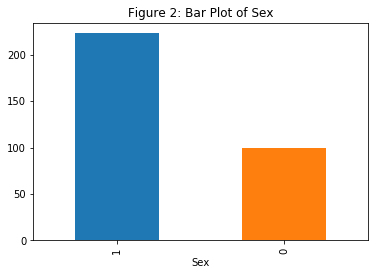

In [13]:
heartData['sex'].value_counts().plot(kind='bar')
plt.title('Figure 2: Bar Plot of Sex')
plt.xlabel('Sex')
plt.show()

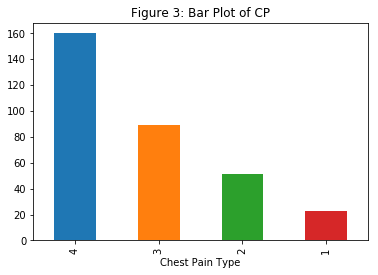

In [14]:
heartData['cp'].value_counts().plot(kind='bar')
plt.title('Figure 3: Bar Plot of CP')
plt.xlabel('Chest Pain Type')
plt.show()

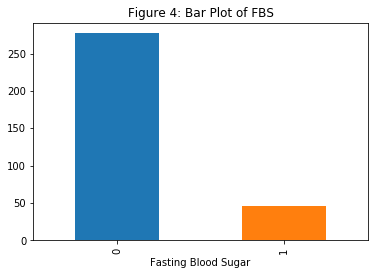

In [15]:
heartData['fbs'].value_counts().plot(kind='bar')
plt.title('Figure 4: Bar Plot of FBS')
plt.xlabel('Fasting Blood Sugar')
plt.show()

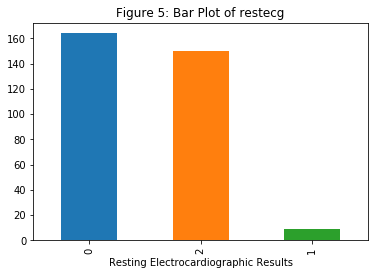

In [16]:
heartData['restecg'].value_counts().plot(kind='bar')
plt.title('Figure 5: Bar Plot of restecg')
plt.xlabel('Resting Electrocardiographic Results')
plt.show()

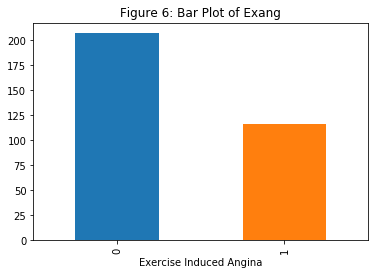

In [17]:
heartData['exang'].value_counts().plot(kind='bar')
plt.title('Figure 6: Bar Plot of Exang')
plt.xlabel('Exercise Induced Angina')
plt.show()

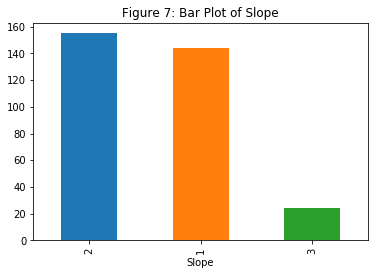

In [18]:
heartData['slope'].value_counts().plot(kind='bar')
plt.title('Figure 7: Bar Plot of Slope')
plt.xlabel('Slope')
plt.show()

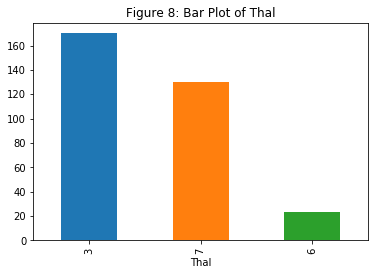

In [19]:
heartData['thal'].value_counts().plot(kind='bar')
plt.title('Figure 8: Bar Plot of Thal')
plt.xlabel('Thal')
plt.show()

Figure 2 above shows a bar graph of the `sex` variable and with 268 males in the data, there are approximately 2.5x more males in the data than there are females, while Figure 3 shows a bar graph of the chest pain variable, with the most common type of chest pain being asymptomatic at approximately 200 instances. This is twice as frequent as the next common type of chest pain which is non-anginal pain. Figure 4 shows a bar graph of the fasting blood sugar (fbs) variable where a true/false value is reported for whether the fbs variable is read at >120 mg/dl. The plot shows that the vast majority of observations reported false. Figure 5 shows a bar graph of the restecg variable with most occurances having a 0 value representing normal results. Approximately 150 instances show probable or definite left ventricular hypertrophy and approximately 25 instances have an ST-T wave abnormality. Figure 6 shows a bar graph with a value of 1 illustrating the presence of exercise induced angina. The most frequent occurance is a value of 0 indicating the absence of exercise induced angina. Figure 7 shows a bar graph of the slope of the peak exercise ST segment, with the two most frequent occurances being flat and upsloping and these two categories accounting for the majority of instances in the data. Finally, Figure 8 shows a bar graph of three different levels of thalassemia. Values 3 and 7 represent a normal and reversable defect respectively and account for the majority of occurances in the data with approximately 340 observations compared to the 25 or so occurances of a fixed defect level.

[Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Figure 9: Boxplot and Histogram of Trestbps')]

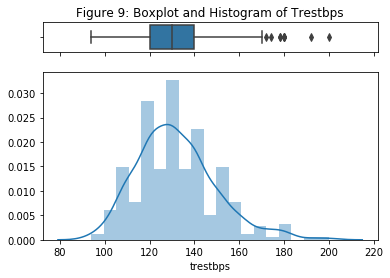

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(heartData["trestbps"], ax=ax_box)
sns.distplot(heartData["trestbps"], ax=ax_hist)
ax_box.set(xlabel='', title='Figure 9: Boxplot and Histogram of Trestbps')

The boxplot and histogram above shows how the resting blood pressure, or `trestbps` variable is distributed. The mean value rests at approximately 130 and it can be seen from the boxplot that there are a number of outliers indicating that there are numerous instances of individuals with very high resting blood pressure.

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Figure 10: Boxplot and Histogram of Chol')]

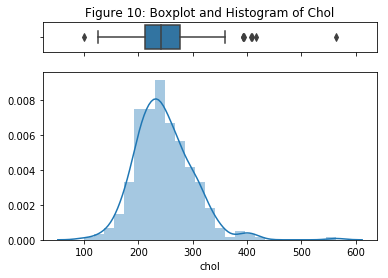

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(heartData["chol"], ax=ax_box)
sns.distplot(heartData["chol"], ax=ax_hist)
ax_box.set(xlabel='', title='Figure 10: Boxplot and Histogram of Chol')

The histogram of cholesterol shows a very high density of instances around the 200-300 mark. The mean cholesterol level lies around 240 mg/dl, and there are also instances of extremely high cholesterol between 500-600 mg/dl as indicated through the outliers on the boxplot.

[Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Figure 11: Boxplot and Histogram of Thalach')]

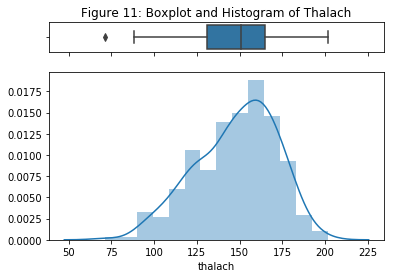

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(heartData["thalach"], ax=ax_box)
sns.distplot(heartData["thalach"], ax=ax_hist)
ax_box.set(xlabel='', title='Figure 11: Boxplot and Histogram of Thalach')

From the plot above, the `thalach` or maximum heart rate variable has a mean value of approximately 150, and it can be observed from the boxplot that there are a number of outliers in the bottom end of the plot with really low maximum heart rates at approximately 60.

[Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Figure 12: Boxplot and Histogram of Oldpeak')]

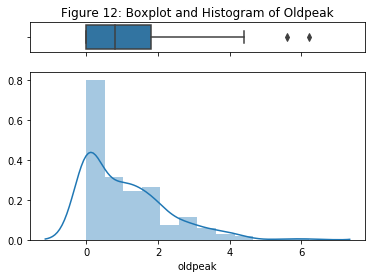

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(heartData["oldpeak"], ax=ax_box)
sns.distplot(heartData["oldpeak"], ax=ax_hist)
ax_box.set(xlabel='', title='Figure 12: Boxplot and Histogram of Oldpeak')

Finally, the plot above shows the oldpeak variable which represents the ST depression induced by exercise relative to rest. The histogram is right skewed with a large occurance of instances at an oldpeak value of 0. Simultaneously, the boxplot shows a number of outliers with oldpeak values ranging beyond 4.

## Multivariate Visualisation

### Scatter Matrix of Continuous Variables

/Users/abhishekshankar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


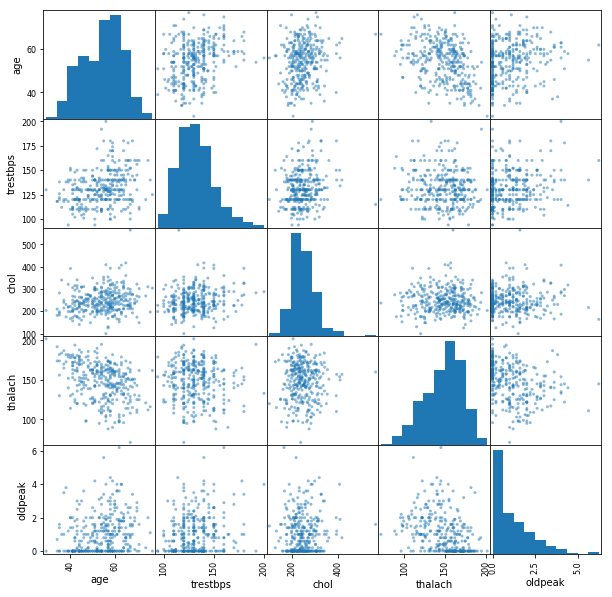

In [24]:
pd.scatter_matrix(heartData[['age','trestbps','chol','thalach','oldpeak']], figsize=(10,10))
plt.show()

The scatter matrix above shows the correlations of each of the continuous variables. Upon inspection there does not appear to be any strongly correlated variables, however `age` does seem to be negatively correlated with `thalach`, which agrees with the scientific literature in that an individual's maximum heart rate is computed as $220 - Age$ <cite data-cite="maxheartrate"></cite>, implying that the older someone is, the lower their maximum heart rate is.

### Relationships Between Continuous Variables and the Target Feature

The code below computes boxplots for each of the continuous variables by the `num` target feature. From this, we can observe that the mean ages for those with heart disease is higher than those without, and the minimum age of those with heart disease is approximately 10 years higher than the minimum age of those without heart disease, indicating that heart disease is more common in the older population as one would expect, however, it is not non-existent in the younger population either. The resting blood pressure (`trestbps`) variable shows similar boxplots for those with and without heart disease, indicating that `trestbps` may not be a prevalent indicator variable. The same can be said about both maximum heart rate (`thalach`) and cholesterol (`chol`) variables. Finally, the `oldpeak` variables which indicates the ST depression induced by exercise relative to rest shows has a mean value of approximately twice as large for those with heart disease than without, which may indicate that it is another prevalent variable.


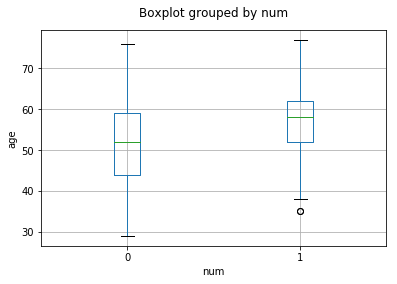

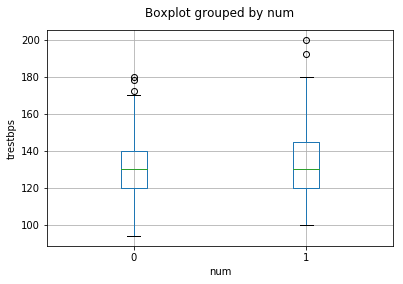

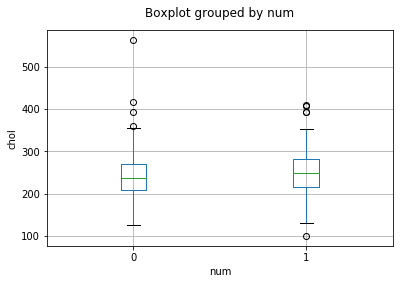

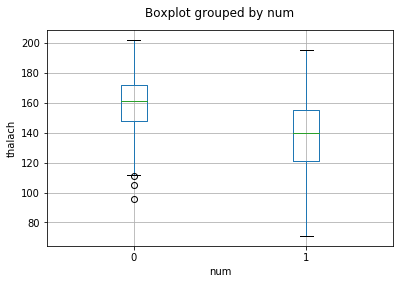

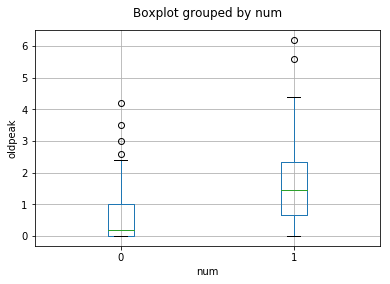

In [25]:
for col in ['age','trestbps', 'chol', 'thalach', 'oldpeak']:
        heartData.boxplot(column=col, by='num')
        plt.xlabel('num')
        plt.ylabel(col)
        plt.title('')
        plt.show()

### Chest Pain Type

The boxplot below illustrates individual ages and the type of chest pains they exhibit. Typical angina accounts for the highest mean amongst all occurances whilst also having the lowest maximum value as seen by its upper whisker, while atypical angina has the lowest mean value. Furthermore, atypical angina seems to be the type of chest pain that affects individuals of the largest age range with individuals under 30 and close to 75 being affected. 

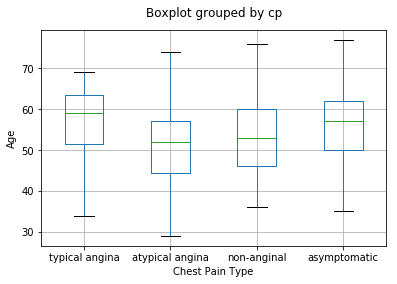

In [26]:
heartData.boxplot(column='age', by='cp')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.xticks([1, 2, 3, 4], ['typical angina', 'atypical angina', 
                          'non-anginal', 'asymptomatic'])
plt.title('')
plt.show()

Continuing, the plot below shows the spread of chest pain by heart disease status and ages and shows that the vast majority of individuals who have heart disease exhibit asymptomatic chest pains, and is consistent amonst the entire range of ages of the individuals in the data set. Non-anginal chest pain seems to have the second largest density of individuals with heart disease and it seems to become more commonly affected to older individuals. From these two plots, we can state with confidence that chest pains seems to be a strong indicator of whether or not a person has heart disease. 

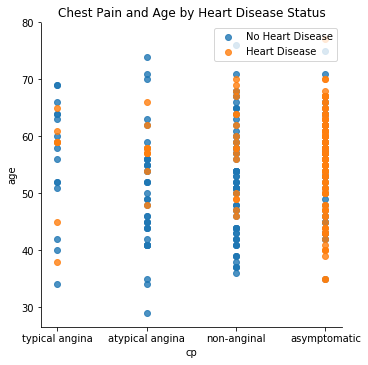

In [27]:
sns.lmplot('cp', 'age', heartData, hue='num', fit_reg=False, legend_out = False)
plt.title('Chest Pain and Age by Heart Disease Status')
plt.xticks([1, 2, 3, 4], ['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic'])
plt.legend(loc = "upper right", labels=['No Heart Disease', 'Heart Disease'])
plt.show()

### Thalassemia 

The scatter plot below is shows how the different types of thalassemia is distributed amongst different ages of individuals and whether or not these instances are of individuals that have heart disease. From the plot, it can be seen that the vast majority of individuals that have a reversable defect or a fixed defect also have heart disease. Those with normal thalassemia show an approximately even distribution of individuals with and without heart disease which may indicate that the `thal` variable may not be a strong indicator of heart disease.

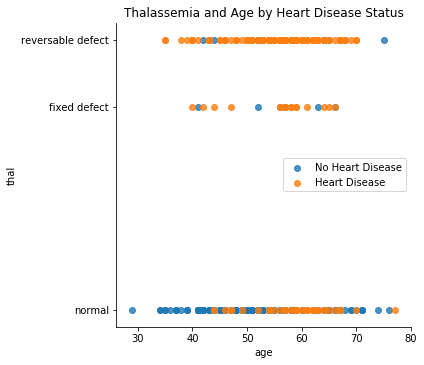

In [28]:
sns.lmplot('age', 'thal', heartData, hue='num', fit_reg=False, legend_out = False)
plt.title('Thalassemia and Age by Heart Disease Status')
plt.yticks([3, 6, 7], ['normal', 'fixed defect', 'reversable defect'])
plt.legend(loc = "center right", labels=['No Heart Disease', 'Heart Disease'])
plt.show()

### Exercised Induced Angina

The plot below shows a scatter plot of exercise induced angina and age by heart disease status and it can be observed that the majority of people with heart disease has exercise induced angina, however there are a significant amount of individuals who have exercise induced angina who do not have heart disease, which indicates that there are other factors which contribute to whether an individual has heart disease, and that `exang` may not be a significant predictor variable. 

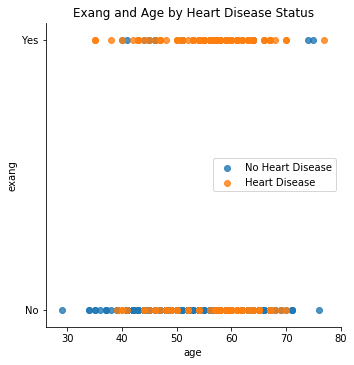

In [29]:
sns.lmplot('age', 'exang', heartData, hue='num', fit_reg=False, legend_out = False)
plt.title('Exang and Age by Heart Disease Status')
plt.yticks([0, 1], ['No', 'Yes'])
plt.legend(loc = "center right", labels=['No Heart Disease', 'Heart Disease'])
plt.show()

# Summary

In Phase 1, the data set was concatenated from the four separate sources and cleaned by removing instances encoded as `?` and removing the `ca` variable entirely as the number of missing values accounted for the majority of the instances in the data set and removing those instances would result in a large amount of information loss. Furthermore, an exploration into the data showed that `cp`, `oldpeak`, `exang`, are potentially useful variables in predicting whether an individual has heart disease, while `trestbps`, `thalach`, and `chol` may not be useful variables.

In [44]:
heartData.dtypes

age         float64
sex          object
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num           int64
dtype: object

In [62]:
heartData['sex'] = heartData['sex'].map({1:'male', 0:'female'})
heartData['cp'] = heartData['cp'].map({1:'typial angina', 2:'atypical angina', 3:'non-anginal pain', 4:'asymptomatic'})
heartData['fbs'] = heartData['fbs'].map({1:'true', 0:'false'})
heartData['restecg'] = heartData['restecg'].map({0:'normal', 1:'SS-T wave abnormality', 2:'left ventricular hypertrophy'})
heartData['exang'] = heartData['exang'].map({1:'yes', 0:'no'})
heartData['slope'] = heartData['slope'].map({1:'upsloping', 2:'flat', 3:'downsloping'})
heartData['thal'] = heartData['thal'].map({3:'normal', 6:'fixed defect', 7:'reversible defect'})


In [65]:
heartData['thal'].value_counts

<bound method IndexOpsMixin.value_counts of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
169    NaN
170    NaN
171    NaN
172    NaN
173    NaN
174    NaN
175    NaN
176    NaN
177    NaN
178    NaN
179    NaN
180    NaN
181    NaN
182    NaN
183    NaN
184    NaN
185    NaN
186    NaN
187    NaN
188    NaN
189    NaN
190    NaN
191    NaN
192    NaN
193    NaN
194    NaN
195    NaN
196    NaN
197    NaN
198    NaN
Name: thal, Length: 917, dtype: object>

In [30]:
# Write clean dataframe to csv
heartData.to_csv("phase2/cleanHeartData.csv")